In [1]:
load('interval_signals.py')

In [2]:
from flowstar.reachability import Poly, Reach, set_precision

In [3]:
set_precision(53)

In [4]:
varsd = [b't', b'x', b'y']
qt = Poly(1, 't', 0, varsd)
qx = Poly(-1, 'y', 1, varsd)
qy = Poly(1, 'x', 1, varsd)
print "t' = {}\nx' = {}\ny' = {}".format(qt, qx, qy)

D = Reach(
    varsd,
    [qt, qx, qy],
    [(0,0), (4,5), (1,2)],
    10,
    0.75,
    order=10,
    precondition=1,
    estimation=1e-1,
    cutoff_threshold=1e-20,
)

t' = (([1.0000000000e+00 , 1.0000000000e+00]))
x' = (([-1.0000000000e+00 , -1.0000000000e+00] * y))
y' = (([1.0000000000e+00 , 1.0000000000e+00] * x))


In [5]:
D.res

2

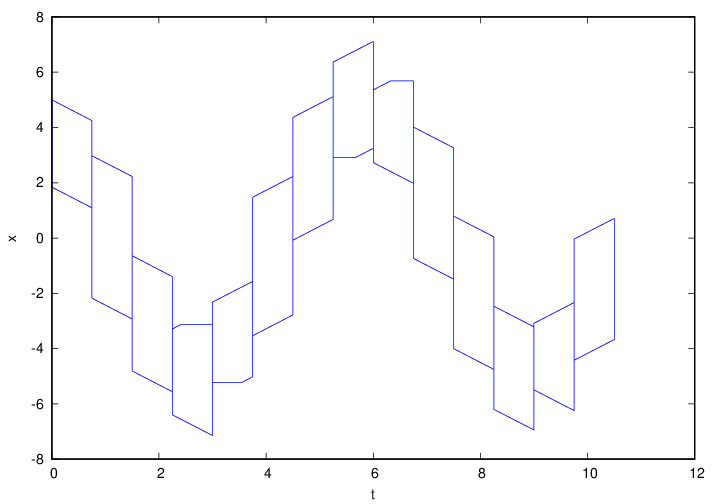

In [6]:
D.wplot('t', 'x')

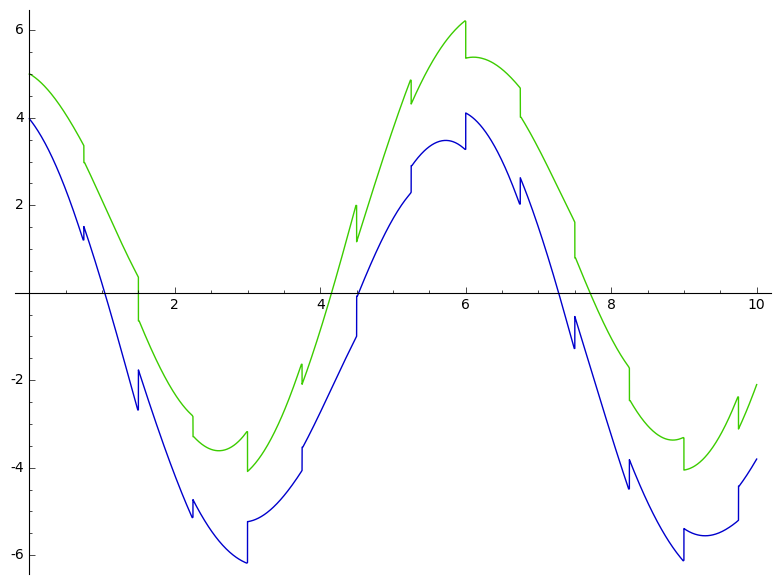

In [7]:
D.sage_plot('x')

In [8]:
def f(v, x):
    x = RIF(x)
    res = D(x)
    return RIF(res[varsd.index(v)])

In [9]:
from functools import partial

In [10]:
p1 = D.sage_plot('x')

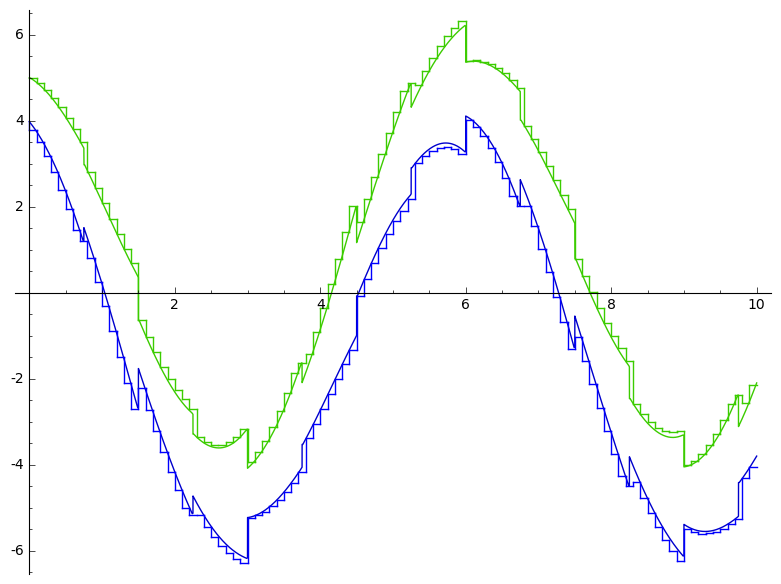

In [11]:
p1 + D.sage_plot_manual('x')

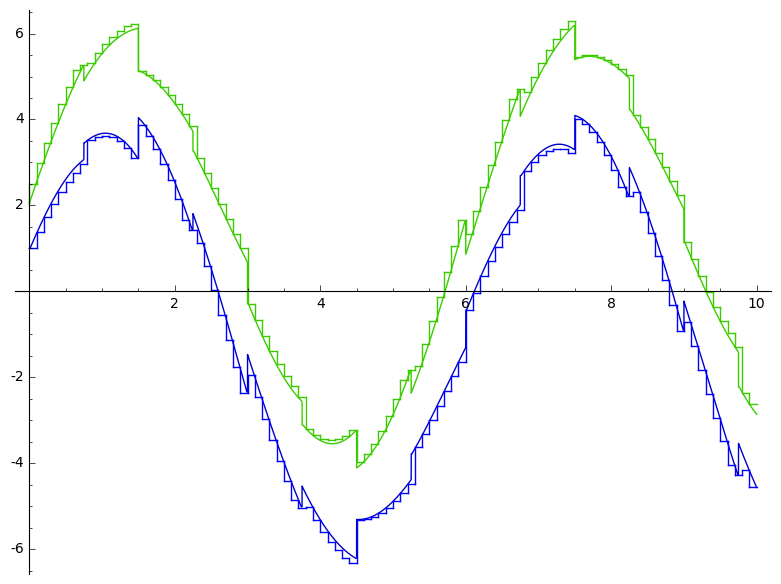

In [12]:
D.sage_plot('y') \
 + D.sage_plot_manual('y')

$x' = - y$

In [13]:
p2 = plot([(lambda t: -f('y', t).upper()),
          (lambda t: -f('y', t).lower())], (0, 10))

Will not work -- signal is discontinuous

In [14]:
sig = to_signal((lambda t: f('x', t)),
                (lambda t: -f('y', t)),
                RIF(0, 10))
sig

  I  = [0.00000000000000000 .. 1.0471492695953231]
f(I) = [1.0937496004676434 .. 5.0000004358456458]
stopping since presumed converged
t = [1.4060914784793123 .. 1.5082417358951533], fprime(t) = [-6.2222686362724611 .. -3.0926882952014658]
  I  = [1.4050914784793122 .. 1.4060914784793124]
f(I) = [-2.1040595483314908 .. 0.62377237520894336]
  I  = [1.5082417358951532 .. 4.1673553930359431]
f(I) = [-7.1436637695751868 .. 0.046092880625733905]
  I  = [4.5186065624338800 .. 7.2874634128982319]
f(I) = [-0.077342758480222540 .. 7.1152626399656907]


Signal([0.00000000000000000 .. 10.000000000000000], [([0.00000000000000000 .. 1.0471492695953231], True), ([1.4050914784793122 .. 1.4060914784793124], False), ([1.5082417358951532 .. 4.1673553930359431], False), ([4.5186065624338800 .. 7.2874634128982319], True), ([7.6980858783546910 .. 10.000000000000000], False)])

In [15]:
sig = to_signal_bisection((lambda t: f('x', t)), RIF(0, 10), 0.1)

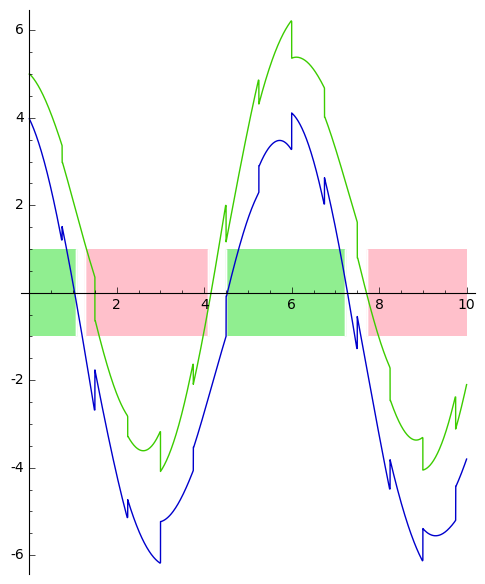

In [16]:
sig.plot() + p1

In [17]:
load('interval_root_isolation.py')

In [18]:
roots = list(isolate_roots((lambda t: f('x', t)),
                           (lambda t: -f('y', t)),
                           RIF(0,1.5)))
roots

[2.?]

In [19]:
roots += list(isolate_roots((lambda t: f('x', t)),
                           (lambda t: -f('y', t)),
                           RIF(1.5,2)))
roots

stopping since presumed converged
t = [1.5000000000000000 .. 1.5150999999999999], fprime(t) = [-5.1289522619859565 .. -4.0342777307933488]


[2.?, 1.51?]

In [20]:
roots[0].str(style='brackets')

'[1.0471490191358754 .. 1.5000000000000000]'

In [21]:
roots[1].str(style='brackets')

'[1.5000000000000000 .. 1.5150999999999999]'

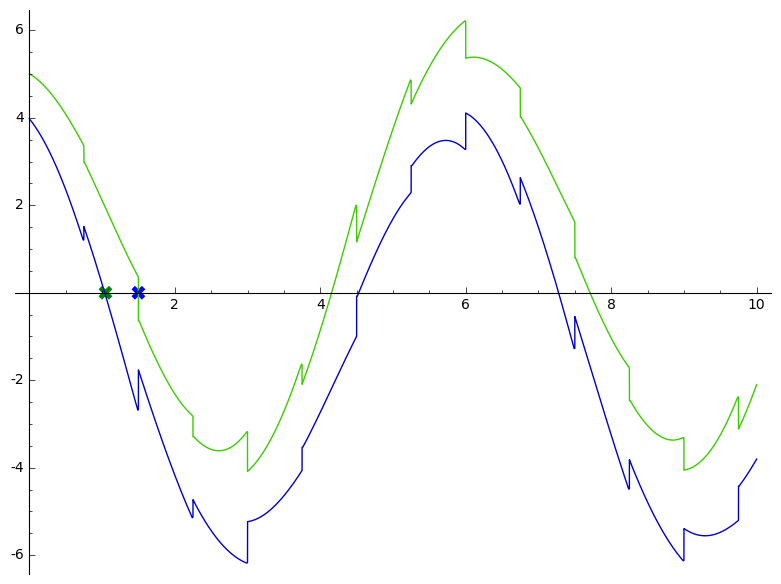

In [22]:
  p1 \
+ point((roots[0].lower(), 0), size=100, color='green', marker='X') \
+ point((roots[0].upper(), 0), size=100, marker='X')

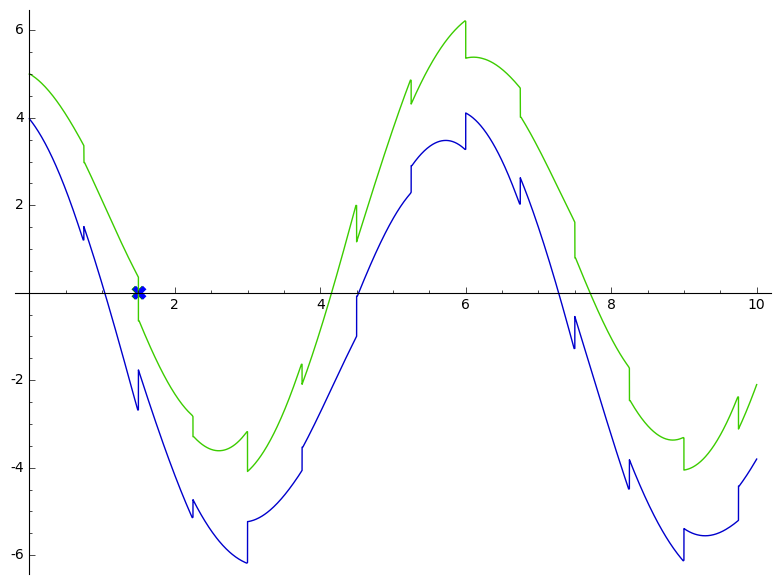

In [23]:
  p1 \
+ point((roots[1].lower(), 0), size=100, color='green', marker='X') \
+ point((roots[1].upper(), 0), size=100, marker='X')

In [24]:
sig = Signal(RIF(0), [])
step = 0.75
for i in range(10/step):
    sig = sig.union(to_signal((lambda t: f('x', t)),
                              (lambda t: -f('y', t)),
                              RIF(step*i, step*(i+1))))
sig

  I  = [0.75000000000000000 .. 1.0471493894806141]
f(I) = [-0.015530607801751001 .. 2.9768070823578757]
stopping since presumed converged
t = [1.5000000000000000 .. 1.5150999999999999], fprime(t) = [-5.1289522619859565 .. -4.0342777307933488]
  I  = [3.7500000000000000 .. 4.1662557181795146]
f(I) = [-3.5312475405131308 .. 0.039526981690329859]
  I  = [6.7500000000000000 .. 7.2874626322614518]
f(I) = [-0.077337923106332363 .. 4.0150417763828239]


Signal([0.00000000000000000 .. 9.7500000000000000], [([0.00000000000000000 .. 1.0471493894806141], True), ([1.5150999999999998 .. 4.1662557181795146], False), ([4.5186047217334950 .. 7.2874626322614518], True), ([7.6980849541590412 .. 9.7500000000000000], False)])

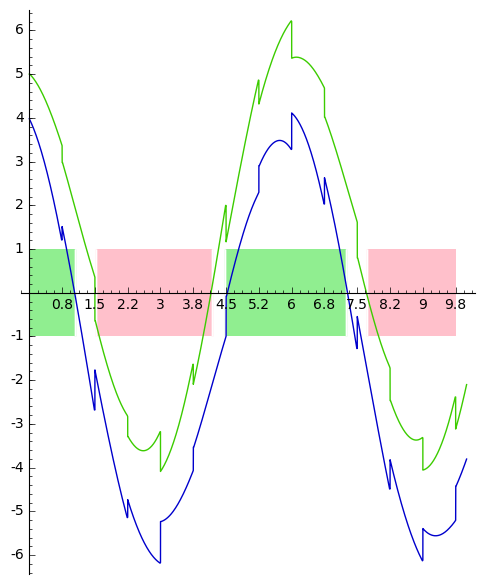

In [25]:
(sig.plot() + p1).show(ticks=[0.75, 1])

In [26]:
sig1 = Signal(RIF(0), [])
step = 0.75
for i in range(10/step):
    sig1 = sig1.union(to_signal_bisection((lambda t: f('x', t)),
                                          RIF(step*i, step*(i+1))))
sig1

Signal([0.00000000000000000 .. 9.7500000000000000], [([0.00000000000000000 .. 1.0312500000000000], True), ([1.5000000000000000 .. 4.1250000000000000], False), ([4.5937500000000000 .. 7.2187500000000000], True), ([7.7812500000000000 .. 9.7500000000000000], False)])

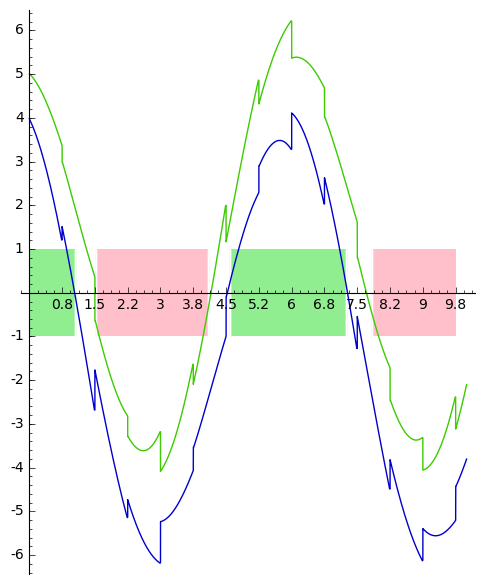

In [27]:
(sig1.plot() + p1).show(ticks=[0.75, 1])

In [28]:
def to_signal_piecewise(f, fprime, time, step):
    sig = Signal(RIF(0), [])
    for i in range(time/step):
        sig = sig.union(to_signal(f, fprime, RIF(step*i, step*(i+1))))
    return sig

  I  = [0.75000000000000000 .. 1.1570271720611696]
f(I) = [-0.66597081081505139 .. 2.9768070823578757]
stopping since presumed converged
t = [1.5000000000000000 .. 1.5150999999999999], fprime(t) = [0.64380601790173608 .. 1.7894911654746469]
  I  = [3.7500000000000000 .. 4.2138260795890839]
f(I) = [-3.5312475405131308 .. 0.32746150132597852]
stopping since presumed converged
t = [4.5000000000000000 .. 4.5450999999999997], fprime(t) = [-1.3514192997566586 .. 0.076466813096829803]
  I  = [6.7500000000000000 .. 7.3291254314317538]
f(I) = [-0.33888767474220106 .. 4.0150417763828239]
stopping since presumed converged
t = [7.5850596540613191 .. 7.7377203531079504], fprime(t) = [-0.45592135185632721 .. 1.7884688031834355]
  I  = [7.5840596540613187 .. 7.5850596540613192]
f(I) = [-0.94989724628901518 .. 0.45302124877401518]


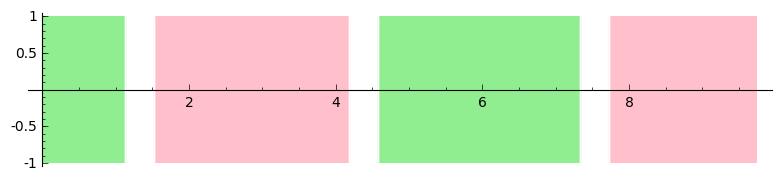

In [29]:
to_signal_piecewise((lambda t: f('x', t)), (lambda t: -f('x', t)),
                    10, 0.75).plot()

## Contexts

In [30]:
varsc = [b't', b'x']
pt = Poly(1, 't', 0, varsc)
px = Poly(-1, 'x', 1, varsc)
print "t' = {}\nx' = {}".format(pt, px)

t' = (([1.0000000000e+00 , 1.0000000000e+00]))
x' = (([-1.0000000000e+00 , -1.0000000000e+00] * x))


In [31]:
C = Reach(
    varsc,
    [pt, px],
    [(0,0), (5,5)],
    5,
    0.5,
    order=10,
)

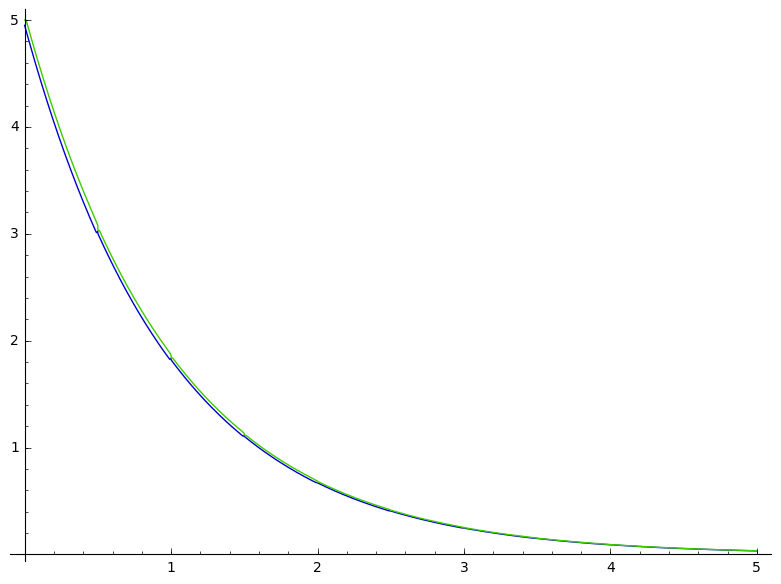

In [32]:
C.sage_plot('x')

In [33]:
def continuation(x):
    S = Reach(
        varsc,
        [pt, px],
        [(0,0), x],
        5,
        0.5,
        order=10,
    )
    return lambda t: S(t)[1]

In [35]:
continuation(2)(3)

(0.09957411031876763, 0.09957416301696219)

In [ ]:
C(RIF(0,1),
  (lambda x: x + 1),
  (lambda f: f(0) > 1),
  (lambda t: f('x', t)),
  (lambda x: ))